## Linear Regression
### Gradient Descent Function & Compute Cost Function

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy.linalg import inv
np.seterr(all='raise')

def computeCost(X, y, theta):           # calculate cost function value
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):              # in every iteration
        error = (X * theta.T) - y       # compute the error
        
        for j in range(parameters):     # for every parameter update the value
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost                  # returns theta vector and history of the cost value

### 1D - Load, print, and visualize data


1D data:

   Ones  Population   Profit
0     1      6.1101  17.5920
1     1      5.5277   9.1302
2     1      8.5186  13.6620
3     1      7.0032  11.8540
4     1      5.8598   6.8233
       Ones  Population     Profit
count  97.0   97.000000  97.000000
mean    1.0    8.159800   5.839135
std     0.0    3.869884   5.510262
min     1.0    5.026900  -2.680700
25%     1.0    5.707700   1.986900
50%     1.0    6.589400   4.562300
75%     1.0    8.578100   7.046700
max     1.0   22.203000  24.147000


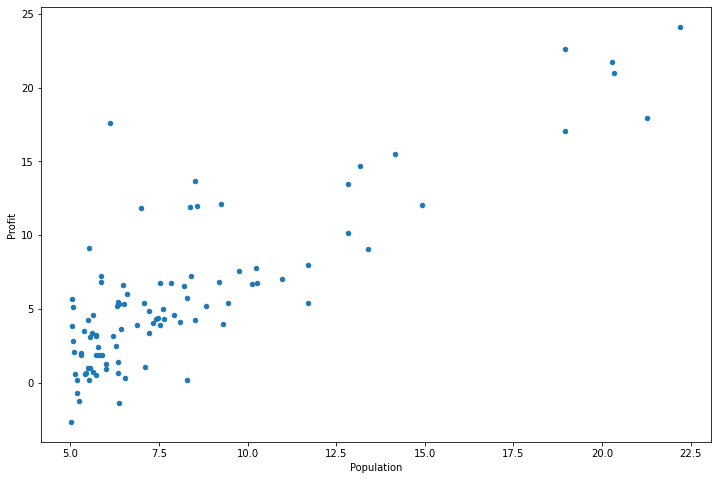

In [2]:
data = pd.read_csv('ex1data1.txt', header=None, names=['Population', 'Profit'])     # open data file for single variable regression

data.insert(0, 'Ones', 1)       # insert a column of ones, these will be the values of x0
print ("\n1D data:\n")
print (data.head())
print (data.describe())

data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))   # plot the data points

### 1D - Linear regression with gradient descent

In [3]:
cols = data.shape[1]
X = data.iloc[:,0:cols-1]               # training data features are everything but the last column
y = data.iloc[:,cols-1:cols]            # training data target values are in the last column
print ("\nX (features):\n",X.head())
print ("\ny (output):\n",y.head())

X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))
print(X.shape)
print(y.shape)
print(theta.shape)

alpha = 0.01                            # learning rate (try changing it)
iters = 1000                            # number of iterations (try changing it)

g, cost = gradientDescent(X, y, theta, alpha, iters)        # do a gradient descent to get the theta vector
print ("\nFinal parameter values obtained by gradient descent:\n",g)


X (features):
    Ones  Population
0     1      6.1101
1     1      5.5277
2     1      8.5186
3     1      7.0032
4     1      5.8598

y (output):
     Profit
0  17.5920
1   9.1302
2  13.6620
3  11.8540
4   6.8233
(97, 2)
(97, 1)
(1, 2)

Final parameter values obtained by gradient descent:
 [[-3.24140214  1.1272942 ]]


### 1D - Linear regression with normal equation

In [4]:
resenie = inv(X.T*X)*X.T*y          # linear regression with normal equation (single feature)

print ("\nFinal parameter values obtained by normal equation:\n",resenie.T)


Final parameter values obtained by normal equation:
 [[-3.89578088  1.19303364]]


### 1D - Plotting models and results

Text(0.5, 1.0, 'Error vs. Training Epoch (single feature)')

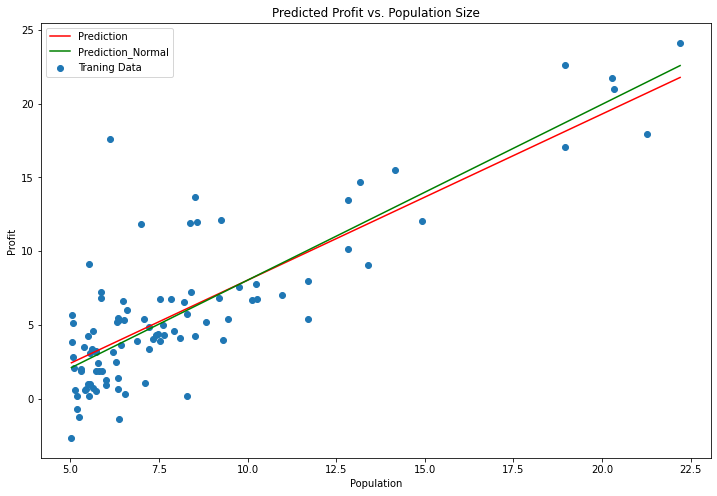

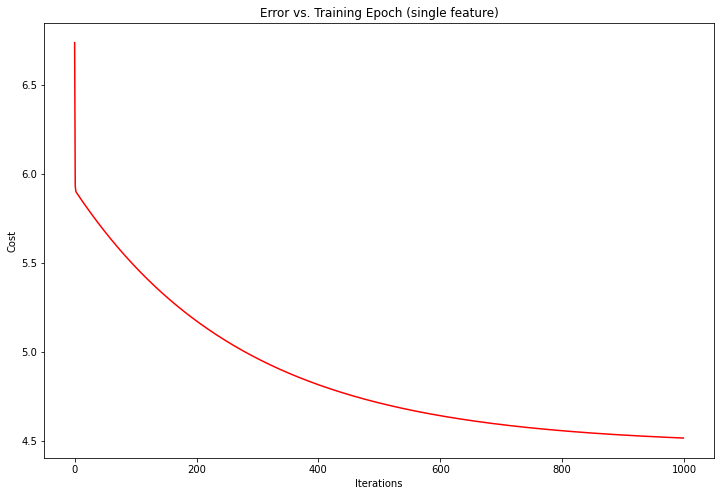

In [5]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)                                         # this is the linear model for prediction with the parameters obtained by gradient descent
f_normal = resenie[0, 0] + (resenie[1, 0] * x)                      # this is the linear model for prediction with the parameters obtained by the normal equation

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')                              # plot the prediction line (gradient descent)
ax.plot(x, f_normal, 'g', label='Prediction_Normal')                # plot the prediction line (normal equation)
ax.scatter(data.Population, data.Profit, label='Traning Data')      # plot the data points
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')                                # plot the history of the cost value 
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch (single feature)')

### 2D - Load, print, and visualize data


Original 2D data:

   Size  Bedrooms   Price
0  2104         3  399900
1  1600         3  329900
2  2400         3  369000
3  1416         2  232000
4  3000         4  539900
              Size   Bedrooms          Price
count    47.000000  47.000000      47.000000
mean   2000.680851   3.170213  340412.659574
std     794.702354   0.760982  125039.899586
min     852.000000   1.000000  169900.000000
25%    1432.000000   3.000000  249900.000000
50%    1888.000000   3.000000  299900.000000
75%    2269.000000   4.000000  384450.000000
max    4478.000000   5.000000  699900.000000

Normalized 2D data:

   Ones      Size  Bedrooms     Price
0     1  0.130010 -0.223675  0.475747
1     1 -0.504190 -0.223675 -0.084074
2     1  0.502476 -0.223675  0.228626
3     1 -0.735723 -1.537767 -0.867025
4     1  1.257476  1.090417  1.595389
       Ones          Size      Bedrooms         Price
count  47.0  4.700000e+01  4.700000e+01  4.700000e+01
mean    1.0  1.889741e-17  2.279500e-16 -8.031401e-17
std    

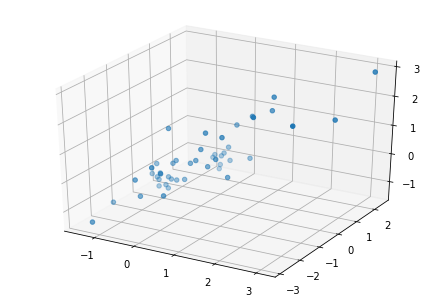

In [6]:
data2 = pd.read_csv('ex1data2.txt', header=None, names=['Size', 'Bedrooms', 'Price'])  # open data file for multiple variable regression
print ("\nOriginal 2D data:\n")
print (data2.head())
print (data2.describe())

data2 = (data2 - data2.mean() ) / data2.std()        # normalize the features in the multiple variable regression 
data2.insert(0, 'Ones', 1)      # insert a column of ones, these will be the values of x0
print ("\nNormalized 2D data:\n")
print (data2.head())
print (data2.describe())

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data2.Size, data2.Bedrooms, data2.Price, label='Training Data')  # plot the data points

### 2D - Linear regression with gradient descent

In [7]:
cols2 = data2.shape[1]
X2 = data2.iloc[:,0:cols2-1]             # training data features are everything but the last column
y2 = data2.iloc[:,cols2-1:cols2]            # training data target values are in the last column

print ("\nX (features):\n",X2.head())
print ("\ny (output):\n",y2.head())

X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

print(X2.shape)
print(y2.shape)
print(theta2.shape)

alpha = 0.01                            # learning rate (try changing it)
iters = 1000                            # number of iterations (try changing it)

g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)        # do a gradient descent to get the theta vector for multivar case (notice how the same function works for both cases)
print ("\nFinal parameter values obtained by gradient descent:\n",g2)


X (features):
    Ones      Size  Bedrooms
0     1  0.130010 -0.223675
1     1 -0.504190 -0.223675
2     1  0.502476 -0.223675
3     1 -0.735723 -1.537767
4     1  1.257476  1.090417

y (output):
       Price
0  0.475747
1 -0.084074
2  0.228626
3 -0.867025
4  1.595389
(47, 3)
(47, 1)
(1, 3)

Final parameter values obtained by gradient descent:
 [[-1.10868761e-16  8.78503652e-01 -4.69166570e-02]]


### 2D - Linear regression with normal equation

In [8]:
resenie2 = inv(X2.T*X2)*X2.T*y2     # linear regression with normal equation (multiple features)

print ("\nFinal parameter values obtained by normal equation:\n",resenie2.T)


Final parameter values obtained by normal equation:
 [[-1.04083409e-16  8.84765988e-01 -5.31788197e-02]]


### 2D - Plotting models and results

Text(0.5, 1.0, 'Error vs. Training Epoch (two features)')

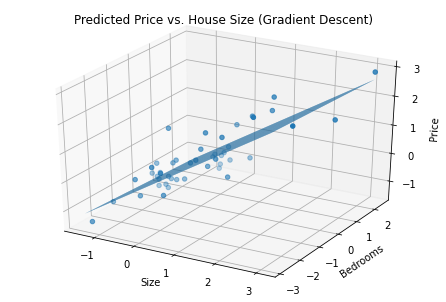

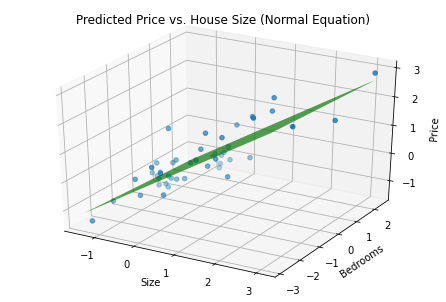

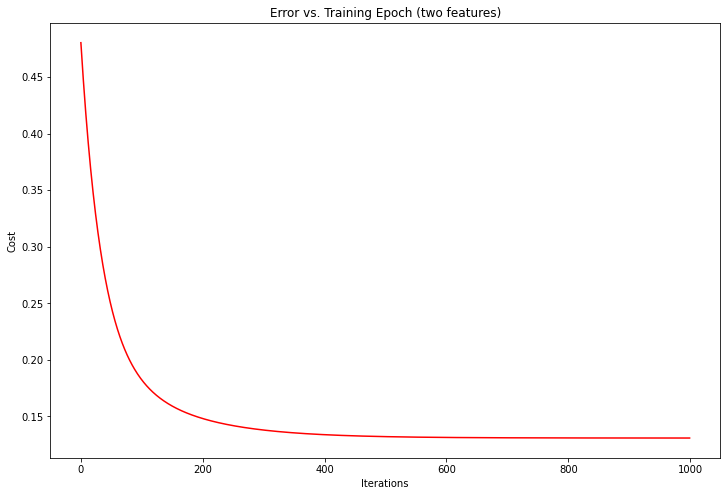

In [9]:
x12 = np.linspace(data2.Size.min(), data2.Size.max(), 100)
x22 = np.linspace(data2.Bedrooms.min(), data2.Bedrooms.max(), 100)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data2.Size, data2.Bedrooms, data2.Price, label='Training Data')  # plot the data points
X12,X22 = np.meshgrid(x12,x22)
f2 = g2[0, 0] + (g2[0, 1] * X12) + (g2[0, 2] * X22)                 # this is the linear model for prediction for the multivar case (gradient descent)
ax.plot_surface(X12, X22, f2, label='Prediction')                   # plot the prediction plane
ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.set_title('Predicted Price vs. House Size (Gradient Descent)')

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data2.Size, data2.Bedrooms, data2.Price, label='Training Data')  # plot the data points
X12,X22 = np.meshgrid(x12,x22)
f2_normal = resenie2[0, 0] + (resenie2[1, 0] * X12) + (resenie2[2, 0] * X22)                 # this is the linear model for prediction for the multivar case (normal equation)
ax.plot_surface(X12, X22, f2_normal, color='g', label='Prediction_Normal') # plot the prediction plane
ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.set_title('Predicted Price vs. House Size (Normal Equation)')

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')                               # plot the history of the cost value for the multivar regression
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch (two features)') 